# Importing Libraries

In [332]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Mounting Drive and adding path to the folder

In [333]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Reading the streamflow quantiles csv

In [334]:
path = '/content/drive/MyDrive/Camels Aus Data/Project files/streamflow_quantiles.csv'
sf_quantiles = pd.read_csv(path)
sf_quantiles = sf_quantiles.drop(columns = ['Unnamed: 0'])
sf_quantiles.rename(columns = {'Station':'station_id'}, inplace = True)
sf_quantiles.head()

,station_id,Loc,Scale,Q2,Q5,Q10,Q15,Q20,Q25,Q50
0,912105A,437.045789,484.278944,-223.537148,-94.299596,33.141438,126.944093,206.584706,278.863695,614.540279
1,915011A,32.120426,32.756683,-12.561479,-3.819836,4.800290,11.145112,16.532012,21.420971,44.126174
2,919003A,960.560135,1028.210731,-441.975477,-167.581061,102.999024,302.158823,471.250076,624.711283,1337.412653
3,919201A,136.863443,130.104224,-40.605826,-5.885441,28.352299,53.552902,74.948795,94.366946,184.548322
4,919309A,716.701501,618.948031,-127.577429,37.598715,200.478761,320.366213,422.153420,514.531869,943.553952


In [335]:
sf_quantiles.shape

(155, 10)

# Reading the Precipitation quantiles csv

In [336]:
path = '/content/drive/MyDrive/Camels Aus Data/Project files/precipitation_quantiles.csv'
prec_quantiles = pd.read_csv(path)
prec_quantiles = prec_quantiles.drop(columns = ['Unnamed: 0'])
prec_quantiles.rename(columns = {'Station':'station_id'}, inplace = True)
prec_quantiles.head()

,station_id,Loc,Scale,Q2,Q5,Q10,Q15,Q20,Q25,Q50
0,912105A,-10.234832,17.006660,-33.432845,-28.894347,-24.418938,-21.124825,-18.328046,-15.789790,-4.001671
1,915011A,-11.087807,17.526422,-34.994804,-30.317599,-25.705412,-22.310622,-19.428368,-16.812537,-4.664147
2,919003A,-11.232284,19.282133,-37.534166,-32.388422,-27.314208,-23.579346,-20.408362,-17.530489,-4.165133
3,919201A,-14.991143,25.155654,-49.304830,-42.591643,-35.971775,-31.099238,-26.962342,-23.207842,-5.771271
4,919309A,-8.909703,15.057605,-29.449100,-25.430738,-21.468235,-18.551644,-16.075392,-13.828033,-3.390896


# Reading the Soil Attributes csv

In [337]:
path = '/content/drive/MyDrive/Camels Aus Data/Project files/soil_attributes.csv'
soil_att = pd.read_csv(path)
soil_att = soil_att.drop(columns = ['Unnamed: 0'])
soil_att.head()

,station_id,geol_prim_prop,geol_sec_prop,unconsoldted,igneous,silicsed,carbnatesed,othersed,metamorph,sedvolc,oldrock,claya,clayb,sanda,solum_thickness,ksat,solpawhc
0,912105A,0.482799,0.324657,0.324657,0.001264,0.180522,0.482799,0.000000,0.010757,0.000000,0.109457,30.000000,21.000000,40.00000,0.900129,80.557045,90.642166
1,915011A,0.893706,0.105490,0.105490,0.893706,0.000804,0.000000,0.000000,0.000000,0.000000,0.000000,62.000000,62.000000,22.00000,1.094932,251.409790,143.969116
2,919003A,0.677353,0.162288,0.130245,0.162288,0.677353,0.000000,0.010952,0.014850,0.004309,0.000000,21.000000,21.000000,52.00000,0.558830,60.711822,93.082611
3,919201A,0.496852,0.358334,0.012790,0.358334,0.496852,0.000000,0.000000,0.132025,0.000000,0.000000,21.000000,21.000000,52.00000,0.577757,85.172989,108.631004
4,919309A,0.532112,0.172999,0.154676,0.532112,0.172999,0.000000,0.085286,0.054931,0.000000,0.058285,20.095238,41.047619,66.76191,0.716285,107.988701,104.810654


# Reading the landcover attributes and vegetation csv

In [338]:
path = '/content/drive/MyDrive/Camels Aus Data/Project files/land_cover_attributes.csv'
lc_att = pd.read_csv(path)
lc_att = lc_att.drop(columns = ['Unnamed: 0'])
lc_att.head()

,station_id,lc01_extracti,lc03_waterbo,lc04_saltlak,lc05_irrcrop,lc06_irrpast,lc07_irrsuga,lc08_rfcropp,lc09_rfpastu,lc10_rfsugar,...,nvis_forests_n,nvis_forests_e,nvis_shrubs_n,nvis_shrubs_e,nvis_woodlands_n,nvis_woodlands_e,nvis_bare_n,nvis_bare_e,nvis_nodata_n,nvis_nodata_e
0,912105A,0.0000,0.00000,0.0,0.00000,0.00000,0.0000,0.00000,0.00000,0.0000,...,0.000000,0.000000,0.0,0.0,70.483002,70.483002,0.0,0.0,0.0,0.000000
1,915011A,0.0000,0.00000,0.0,0.00000,0.00000,0.0000,0.00000,0.00000,0.0000,...,0.000000,0.000000,0.0,0.0,100.000000,100.000000,0.0,0.0,0.0,0.000000
2,919003A,0.0002,0.00301,0.0,0.00314,0.00056,0.0006,0.00000,0.00501,0.0005,...,7.713339,7.590923,0.0,0.0,91.809517,91.023895,0.0,0.0,0.0,0.000954
3,919201A,0.0000,0.00000,0.0,0.00000,0.00000,0.0000,0.00000,0.00000,0.0000,...,21.583656,21.583656,0.0,0.0,78.326363,78.319428,0.0,0.0,0.0,0.000000
4,919309A,0.0005,0.00005,0.0,0.00932,0.00061,0.0009,0.00033,0.00251,0.0000,...,2.393718,2.393718,0.0,0.0,97.483543,97.480568,0.0,0.0,0.0,0.000000


# Reading the topography and geometry csv

In [339]:
path = '/content/drive/MyDrive/Camels Aus Data/Project files/top_geo_attributes.csv'
topg_att = pd.read_csv(path)
topg_att = topg_att.drop(columns = ['Unnamed: 0'])
topg_att.head()

,station_id,elev_min,elev_max,elev_mean,elev_range,mean_slope_pct,upsdist,strdensity,strahler,elongratio,...,mrvbf_prop_1,mrvbf_prop_2,mrvbf_prop_3,mrvbf_prop_4,mrvbf_prop_5,mrvbf_prop_6,mrvbf_prop_7,mrvbf_prop_8,mrvbf_prop_9,confinement
0,912105A,118,431.724457,240.478180,313.724457,2.74,179.650116,0.646987,6,0.668421,...,0.0226,0.1078,0.2310,0.0724,0.0699,0.0905,0.0664,0.0308,0.0,1.0
1,915011A,739,984.951111,839.435852,245.951111,2.64,40.956673,0.594576,4,0.648115,...,0.0182,0.1305,0.2167,0.1030,0.1314,0.0671,0.0000,0.0000,0.0,0.3
2,919003A,183,1355.225342,460.982819,1172.225342,13.45,230.620071,1.006411,7,0.431006,...,0.0737,0.1225,0.1412,0.0279,0.0238,0.0089,0.0000,0.0000,0.0,1.0
3,919201A,403,1346.674805,711.929627,943.674805,18.04,53.494884,1.020470,5,0.487923,...,0.1017,0.1199,0.0579,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,1.0
4,919309A,124,1290.396118,442.698334,1166.396118,9.97,317.360138,0.957482,6,0.331029,...,0.0560,0.1233,0.1843,0.0388,0.0304,0.0201,0.0259,0.0000,0.0,0.0


# Reading the Anthropogenic attributes csv

In [340]:
path = '/content/drive/MyDrive/Camels Aus Data/Project files/anthro_attributes.csv'
anthro_att = pd.read_csv(path)
anthro_att = anthro_att.drop(columns = ['Unnamed: 0'])
anthro_att.head()

,station_id,distupdamw,impound_fac,flow_div_fac,leveebank_fac,infrastruc_fac,settlement_fac,extract_ind_fac,landuse_fac,catchment_di,flow_regime_di,river_di
0,912105A,179.650116,0.0,0.0,0,0.000000,0.000000,0.0,0.285714,0.081591,0.132730,0.107161
1,915011A,40.956673,0.0,0.0,0,0.000000,0.000000,0.0,0.350000,0.213224,0.000682,0.106953
2,919003A,217.713760,0.0,0.0,0,0.000000,0.040000,0.0,0.050000,0.054700,0.146411,0.100555
3,919201A,53.494884,0.0,0.0,0,0.300000,0.100000,0.0,0.200000,0.032784,0.000000,0.016392
4,919309A,294.372955,0.0,0.0,0,0.077778,0.011268,0.0,0.050000,0.064917,0.200487,0.132702


# Reading the Catchment area csv

In [341]:
path = '/content/drive/MyDrive/Camels Aus Data/Project files/catchment_area.csv'
area_att = pd.read_csv(path)
area_att = area_att.drop(columns = ['Unnamed: 0'])
area_att['station_id']=anthro_att['station_id']
area_att.head()

,catchment_area,station_id
0,11392.9,912105A
1,565.3,915011A
2,7731.7,919003A
3,531.7,919201A
4,8656.4,919309A


In [342]:
print(sf_quantiles.shape)
print(prec_quantiles.shape)
print(soil_att.shape)
print(lc_att.shape)
print(topg_att.shape)
print(anthro_att.shape)
print(area_att.shape)

(155, 10)
(155, 10)
(155, 17)
(155, 36)
(155, 23)
(155, 12)
(155, 2)


In [343]:
prec_quantiles.shape[1]+soil_att.shape[1]+lc_att.shape[1]+topg_att.shape[1]+anthro_att.shape[1]

98

# Creating X and Y variables for training and testing models

In [344]:
from sklearn.model_selection import train_test_split

In [345]:
Y = sf_quantiles['Q20']

In [346]:
merged_df = pd.merge(prec_quantiles, soil_att, on='station_id')
merged_df = pd.merge(merged_df, lc_att, on='station_id')
merged_df = pd.merge(merged_df, topg_att, on='station_id')
merged_df = pd.merge(merged_df, anthro_att, on='station_id')
merged_df = pd.merge(merged_df, area_att, on='station_id')

# Print the merged DataFrame
merged_df.head()


,station_id,Loc,Scale,Q2,Q5,Q10,Q15,Q20,Q25,Q50,...,flow_div_fac,leveebank_fac,infrastruc_fac,settlement_fac,extract_ind_fac,landuse_fac,catchment_di,flow_regime_di,river_di,catchment_area
0,912105A,-10.234832,17.006660,-33.432845,-28.894347,-24.418938,-21.124825,-18.328046,-15.789790,-4.001671,...,0.0,0,0.000000,0.000000,0.0,0.285714,0.081591,0.132730,0.107161,11392.9
1,915011A,-11.087807,17.526422,-34.994804,-30.317599,-25.705412,-22.310622,-19.428368,-16.812537,-4.664147,...,0.0,0,0.000000,0.000000,0.0,0.350000,0.213224,0.000682,0.106953,565.3
2,919003A,-11.232284,19.282133,-37.534166,-32.388422,-27.314208,-23.579346,-20.408362,-17.530489,-4.165133,...,0.0,0,0.000000,0.040000,0.0,0.050000,0.054700,0.146411,0.100555,7731.7
3,919201A,-14.991143,25.155654,-49.304830,-42.591643,-35.971775,-31.099238,-26.962342,-23.207842,-5.771271,...,0.0,0,0.300000,0.100000,0.0,0.200000,0.032784,0.000000,0.016392,531.7
4,919309A,-8.909703,15.057605,-29.449100,-25.430738,-21.468235,-18.551644,-16.075392,-13.828033,-3.390896,...,0.0,0,0.077778,0.011268,0.0,0.050000,0.064917,0.200487,0.132702,8656.4


In [347]:
merged_df.shape

(155, 95)

In [348]:
merged_df.drop(columns = ['station_id','Loc','Scale','Q2','Q5','Q15','Q10','Q25','Q50'],inplace = True)
merged_df.head()

,Q20,geol_prim_prop,geol_sec_prop,unconsoldted,igneous,silicsed,carbnatesed,othersed,metamorph,sedvolc,...,flow_div_fac,leveebank_fac,infrastruc_fac,settlement_fac,extract_ind_fac,landuse_fac,catchment_di,flow_regime_di,river_di,catchment_area
0,-18.328046,0.482799,0.324657,0.324657,0.001264,0.180522,0.482799,0.000000,0.010757,0.000000,...,0.0,0,0.000000,0.000000,0.0,0.285714,0.081591,0.132730,0.107161,11392.9
1,-19.428368,0.893706,0.105490,0.105490,0.893706,0.000804,0.000000,0.000000,0.000000,0.000000,...,0.0,0,0.000000,0.000000,0.0,0.350000,0.213224,0.000682,0.106953,565.3
2,-20.408362,0.677353,0.162288,0.130245,0.162288,0.677353,0.000000,0.010952,0.014850,0.004309,...,0.0,0,0.000000,0.040000,0.0,0.050000,0.054700,0.146411,0.100555,7731.7
3,-26.962342,0.496852,0.358334,0.012790,0.358334,0.496852,0.000000,0.000000,0.132025,0.000000,...,0.0,0,0.300000,0.100000,0.0,0.200000,0.032784,0.000000,0.016392,531.7
4,-16.075392,0.532112,0.172999,0.154676,0.532112,0.172999,0.000000,0.085286,0.054931,0.000000,...,0.0,0,0.077778,0.011268,0.0,0.050000,0.064917,0.200487,0.132702,8656.4


In [349]:
X = merged_df
X.shape

(155, 86)

In [350]:
np.corrcoef(X['catchment_area'],Y)

array([[1.        , 0.10113745],
       [0.10113745, 1.        ]])

In [351]:
print(X.shape)
print(Y.shape)

(155, 86)
(155,)


In [ ]:
X.info()

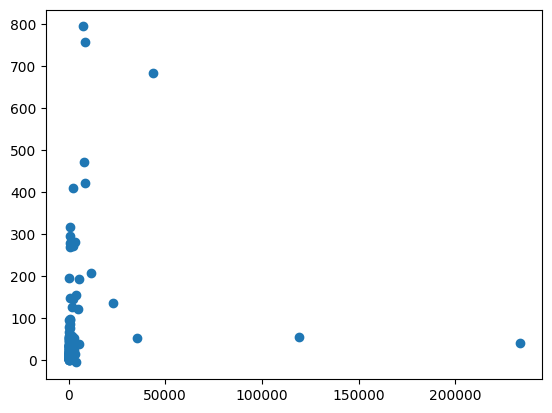

In [352]:
plt.scatter(X['catchment_area'],Y)


# Splitting data to train and test sets

In [353]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 42)

# Standardising the data

In [354]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [355]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [356]:
print(X_train.shape)

(124, 86)


# Using PCA to reduce the dimensions from 86

In [362]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 8)

In [363]:
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [364]:
print(X_train_trf.shape)
print(X_test_trf.shape)

(124, 8)
(31, 8)


# Creating a Linear Regression model

In [365]:
from sklearn.linear_model import LinearRegression

In [366]:
regression = LinearRegression()
regression.fit(X_train_trf,Y_train)

LinearRegression()

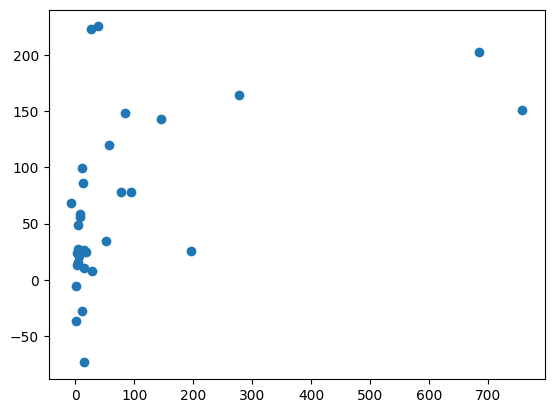

In [367]:
Y_pred = regression.predict(X_test_trf)
plt.scatter(Y_test,Y_pred)


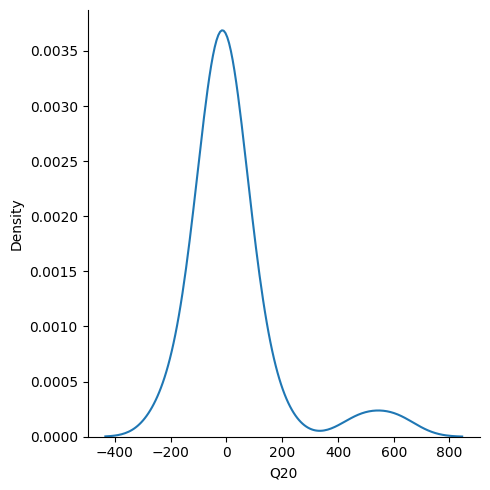

In [368]:
import seaborn as sns
residuals = Y_test - Y_pred
## plot these residuals
sns.displot(residuals,kind = 'kde')

In [369]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(Y_test,Y_pred))
print(mean_squared_error(Y_test,Y_pred))
print(np.sqrt(mean_squared_error(Y_test,Y_pred)))

83.47931807330174
24578.00146248926
156.7737269522201


In [370]:
from sklearn.metrics import r2_score
score = r2_score(Y_test,Y_pred)
print(score)

0.22557241485711976


In [371]:
# X_train_trf = np.array(X_train_trf)
# Y_train = np.array(Y_train)

# Creating an ANN

In [372]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense # Type of layer
from tensorflow.keras.layers import LeakyReLU,ReLU,ELU,PReLU # Activation functions
from tensorflow.keras.layers import Dropout

In [373]:
from tensorflow.keras import models, layers

model_ann = models.Sequential([
    layers.Dense(8),
    layers.Dense(7),
    layers.Dropout(0.3),
    layers.Dense(6),
    layers.Dense(1)
])

In [387]:
model_ann.compile(optimizer = tf.keras.optimizers.Adam(),loss = tf.keras.losses.MeanAbsoluteError(),metrics = [tf.keras.metrics.MeanAbsoluteError(),tf.keras.metrics.MeanSquaredError()]) ## By default the learning rate is initialised as 0.01.


In [388]:
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [391]:
Model_ann = model_ann.fit(X_train_trf,Y_train, epochs = 10, batch_size = 20, callbacks = [early_stopping], validation_split = .2)

Epoch 1/10
5/5 [==============================] - 1s 125ms/step - loss: 58.5797 - mean_absolute_error: 58.5797 - mean_squared_error: 17075.6934 - val_loss: 24.2797 - val_mean_absolute_error: 24.2797 - val_mean_squared_error: 3620.3613
Epoch 2/10
5/5 [==============================] - 0s 89ms/step - loss: 58.3521 - mean_absolute_error: 58.3521 - mean_squared_error: 17234.5586 - val_loss: 24.1719 - val_mean_absolute_error: 24.1719 - val_mean_squared_error: 3609.6797
Epoch 3/10
5/5 [==============================] - 1s 110ms/step - loss: 57.9551 - mean_absolute_error: 57.9551 - mean_squared_error: 16942.6699 - val_loss: 24.0551 - val_mean_absolute_error: 24.0551 - val_mean_squared_error: 3596.7690
Epoch 4/10
5/5 [==============================] - 1s 156ms/step - loss: 57.7182 - mean_absolute_error: 57.7182 - mean_squared_error: 16990.4980 - val_loss: 23.9596 - val_mean_absolute_error: 23.9596 - val_mean_squared_error: 3586.7991
Epoch 5/10
5/5 [==============================] - 1s 141ms/st

1/1 [==============================] - 0s 28ms/step


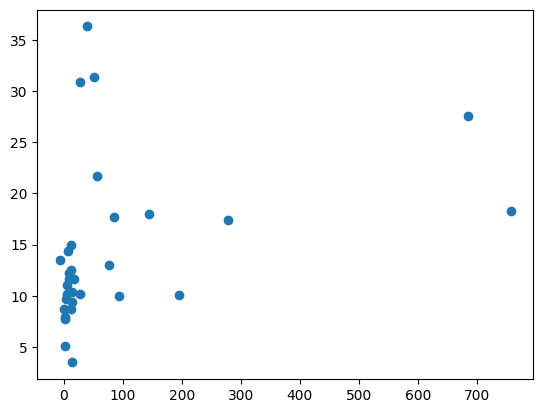

In [392]:
predictions = model_ann.predict(X_test_trf)

# Print the predictions
# print(predictions)
# Y_pred = Model_ann.predict(X_test_trf)
plt.scatter(Y_test,predictions)


# Creating a XGB Regressor

In [378]:
!pip install xgboost

In [379]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [380]:
model_xgb = xgb.XGBRegressor()
model_xgb.fit(X_train_trf, Y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [381]:
y_pred_xgb = model_xgb.predict(X_test_trf)


In [382]:
mse = mean_squared_error(Y_test, y_pred_xgb)
print("Mean Squared Error:", mse)


Mean Squared Error: 30137.213189506583


# Creating a Support vector Regressor

In [383]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

model_svr = SVR()
model_svr.fit(X_train_trf, Y_train)

y_pred_svr = model_svr.predict(X_test_trf)

mse = mean_squared_error(Y_test, y_pred_svr)
print("Mean Squared Error:", mse)


Mean Squared Error: 35351.5255144467
